## 1. Import libraries, test data and split into training/test data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

## 2a. Train the Simple Linear Regression model

Use the training data set to test the model

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## 2b. Use closed form

Using [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares),

`b = (X^T X)^-1 X^T y)` 

In [3]:
class LinearRegressionCF:
    
    def __init__(self):
        self.coef_ = np.array([])
        
    def fit(self, x_set, y_set):
        self.coef_ = np.dot(np.dot(np.linalg.inv(np.dot(x_set.T, x_set)), x_set.T), y_set)
    
    def predict(self, x_set):
        return self.coef_ * x_set

model_cf = LinearRegressionCF()
model_cf.fit(x_train, y_train)

## 2c. Use QR Decomposition

To get an inutition of QR calculations (read [here](https://www.emathhelp.net/calculators/linear-algebra/qr-factorization-calculator)),

1. Orthonormalize the set of vectors formed by the columns of the given matrix
2. Reform and find `Q` matrix from orthonormalized vectors.
3. Set `R = Q^T A`.

Solution: `b = (Q^-1 R)^T y`

Credits: [UCLA](http://www.seas.ucla.edu/~vandenbe/133A/lectures/ls.pdf)

This is [more efficient as it uses the orthogonal matrices](https://math.stackexchange.com/questions/3185211/what-does-qr-decomposition-have-to-do-with-least-squares-method), where `R` is a upper-triangular matrices, avoiding `A^T A` calculations. This should result in the same coefficient as the closed form.

<img src="https://i.ytimg.com/vi/J41Ypt6Mftc/maxresdefault.jpg" width="350" height="auto" />

(Source: [Dr Peyam, 2019](https://www.youtube.com/watch?v=J41Ypt6Mftc))

In [4]:
from scipy.linalg import qr

class LinearRegressionQR:
    
    def __init__(self):
        self.coef_ = np.array([])
        
    def fit(self, x_set, y_set):
        A = x_train
        Q, R = qr(x_train)
        self.coef_ =np.dot(np.dot(np.linalg.inv(Q), R).T, y_train)

    def predict(self, x_set):
        return self.coef_ * x_set

model_qr = LinearRegressionCF()
model_qr.fit(x_train, y_train)

## 3. Start predictions

Use the test data set to predict the previous trained model

In [5]:
y_pred = model.predict(x_test)
y_pred_cf = model_cf.predict(x_test)
y_pred_qr = model_qr.predict(x_test)

## 4. Display graph and details

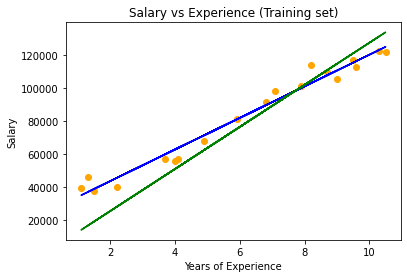

Coefficient b0:  24481.844445834016 

Coefficient b1:  9556.190503260137 

Coefficient b1 (CF):  [12730.19251993] 

Coefficient b1 (QR):  [12730.19251993] 



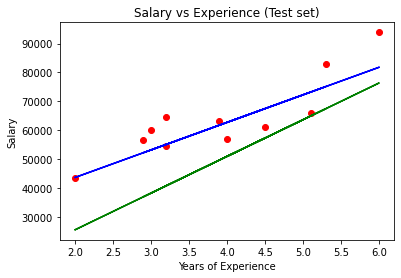

Q(b0, b1):  494980118.23768973 

Q(0, b1):  2736282175.231385 

   x-values  y-value  y-predicted-value  y-predicted-value-cf  \
0     [5.1]  66029.0       73218.416012   [64923.98185162475]   
1     [3.0]  60150.0       53150.415956   [38190.57755977927]   
2     [4.5]  61111.0       67484.701711    [57285.8663396689]   
3     [4.0]  56957.0       62706.606459   [50920.77007970569]   
4     [6.0]  93940.0       81818.987465   [76381.15511955853]   
5     [2.9]  56642.0       52194.796905  [36917.558307786625]   
6     [5.3]  83088.0       75129.654113   [67470.02035561003]   
7     [3.9]  63218.0       61750.987409   [49647.75082771305]   
8     [2.0]  43525.0       43594.225452  [25460.385039852845]   
9     [3.2]  54445.0       55061.654056   [40736.61606376455]   
10    [3.2]  64445.0       55061.654056   [40736.61606376455]   

    residual_epsilon   residual_epsilon_cf  
0        7189.416012   [1105.018148375253]  
1        6999.584044  [21959.422440220733]  
2        6373.701711

In [6]:
from sklearn.metrics import mean_squared_error
from itertools import zip_longest

plt.scatter(x_train, y_train, color = 'orange')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.plot(x_train, model_cf.predict(x_train), color = 'green')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

print('Coefficient b0: ', model.intercept_, '\n')
print('Coefficient b1: ', model.coef_[0], '\n')
print('Coefficient b1 (CF): ', model_cf.coef_, '\n')
print('Coefficient b1 (QR): ', model_qr.coef_, '\n')

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.plot(x_test, y_pred_cf, color = 'green')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

df = pd.DataFrame(list(zip_longest(x_test, y_test, y_pred, y_pred_cf, fillvalue=0)), columns=['x-values', 'y-value', 'y-predicted-value', 'y-predicted-value-cf'])
df["residual_epsilon"] = (df['y-value'] - df['y-predicted-value']).abs()
df["residual_epsilon_cf"] = (df['y-value'] - df['y-predicted-value-cf']).abs()

print('Q(b0, b1): ', mean_squared_error(y_test, y_pred) * len(x_test), '\n')
print('Q(0, b1): ', mean_squared_error(y_test, y_pred_cf) * len(x_test), '\n')
print(df)